# Data visualization: univariate case

<img src="miscellanea/1_boxplot.jpg" width="400">

## Exercise of data visualization
Lets' observe a set of relative distance measurement acquired by two radio-frequency tranceives. Each set of measurement has been made at fixed distance

In [ ]:
head(iris)

In [1]:
# Load the UWBranges.csv data file
ranges <- read.csv("UWBrangesErrors.csv", sep = ",")
# Clean ranges dataset of 0.0 values
# ranges[ranges == 0] <- NA
class(ranges)
head(ranges)
class(ranges$X1m)
head(ranges$X1m)


[1] "data.frame"

,X1m,X2m,X3m,X4m,X5m,X10m,X15m,X25m,X30m
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.13,-0.22,-0.12,-0.14,-0.16,-0.08,-0.01,0.03,-0.16
2,-0.12,-0.21,-0.11,-0.14,-0.15,-0.09,0.02,0.01,-0.17
3,-0.12,-0.20,-0.11,-0.14,-0.13,-0.08,0.02,-0.02,-0.13
4,-0.11,-0.20,-0.11,-0.13,-0.13,-0.12,0.03,0.00,-0.14
5,-0.11,-0.20,-0.10,-0.13,-0.12,-0.08,0.03,0.02,-0.14
6,-0.11,-0.20,-0.10,-0.12,-0.12,-0.07,0.03,0.00,-0.10


[1] "numeric"

[1] -0.13 -0.12 -0.12 -0.11 -0.11 -0.11

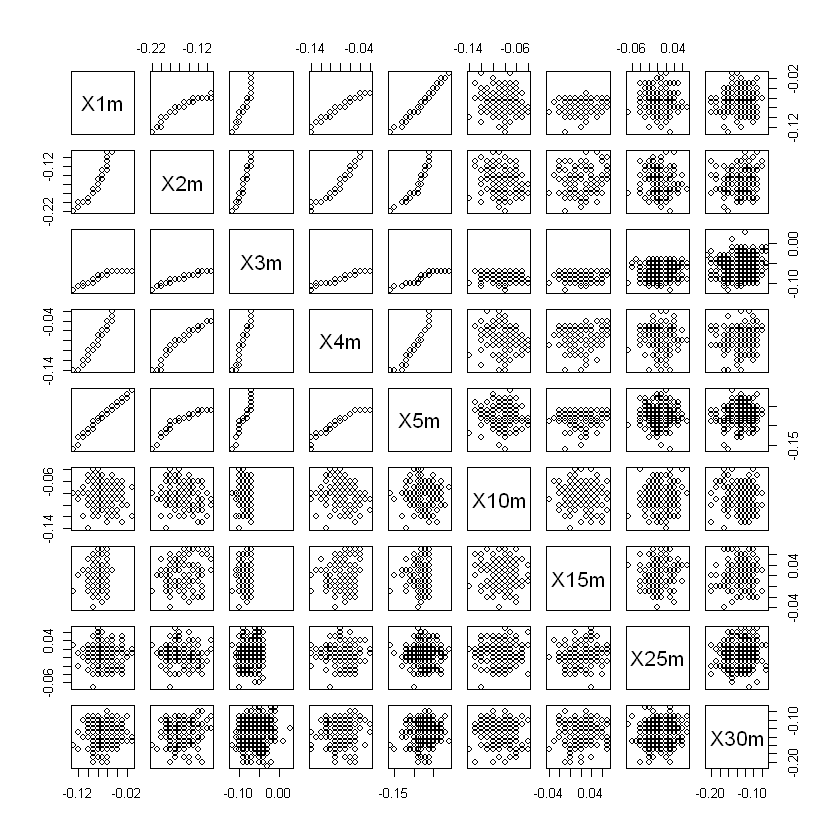

In [2]:
#
plot(ranges)

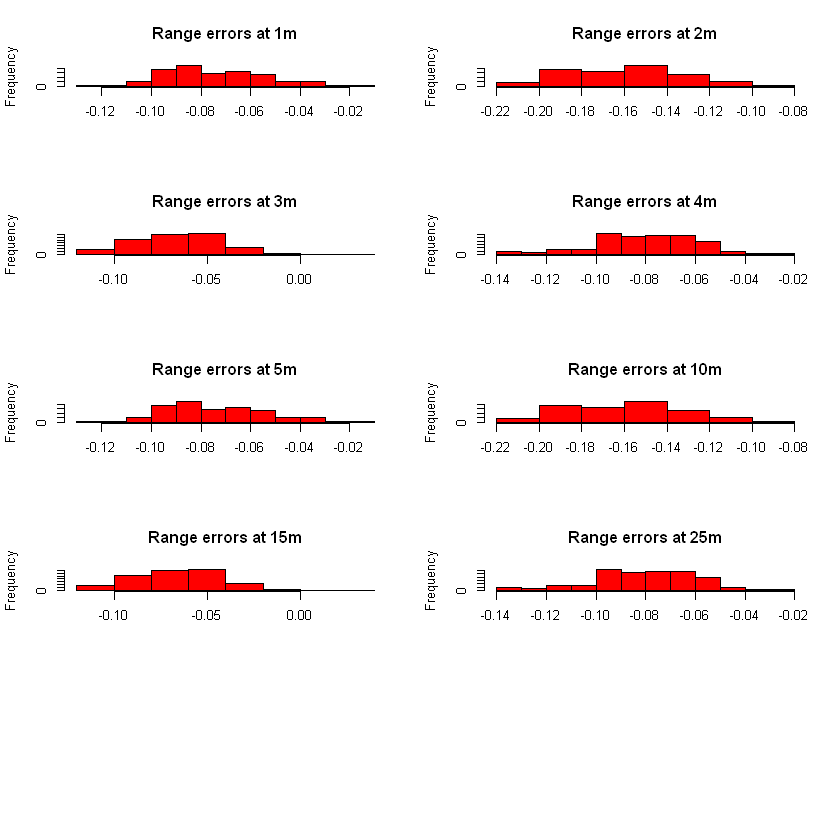

In [3]:
#histogram by group (features, speaces, phenomena)

#Put graphs in 5 rows and 2 columns

par(mfrow = c(5,2))

# Histograms for each species using options
hist(ranges$X1m,
  breaks = 9,
  main = "Range errors at 1m",
  xlab = "",
  col = "red")

# Histograms for each species using options
hist(ranges$X2m,
  breaks = 9,
  main = "Range errors at 2m",
  xlab = "",
  col = "red")

# Histograms for each species using options
hist(ranges$X3m,
  breaks = 9,
  main = "Range errors at 3m",
  xlab = "",
  col = "red")

# Histograms for each species using options
hist(ranges$X4m,
  breaks = 9,
  main = "Range errors at 4m",
  xlab = "",
  col = "red")
hist(ranges$X1m,
  breaks = 9,
  main = "Range errors at 5m",
  xlab = "",
  col = "red")

# Histograms for each species using options
hist(ranges$X2m,
  breaks = 9,
  main = "Range errors at 10m",
  xlab = "",
  col = "red")

# Histograms for each species using options
hist(ranges$X3m,
  breaks = 9,
  main = "Range errors at 15m",
  xlab = "",
  col = "red")

# Histograms for each species using options
hist(ranges$X4m,
  breaks = 9,
  main = "Range errors at 25m",
  xlab = "",
  col = "red")


In [ ]:
help(boxplot)

#Lets observe the univariate distribution via boxplot and analyze the presence of outliers:
<img src="miscellanea/1_boxplot.jpg" width="400">

We have the Interquartile Range (IQR) = Q3-Q1. 

Lets see if we have extreme or mild outliers

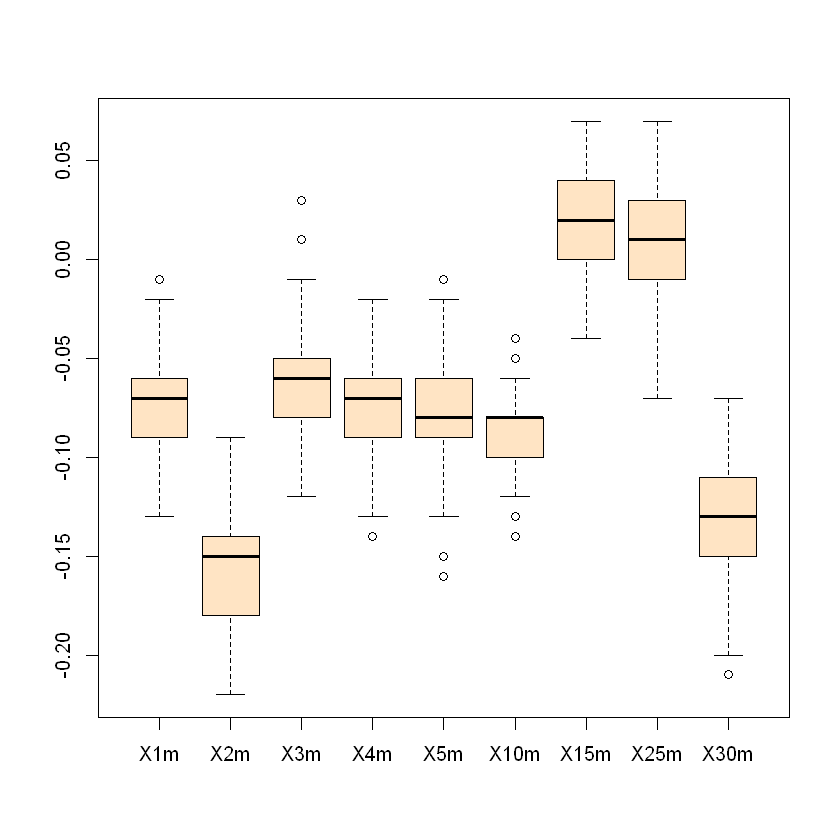

In [4]:
boxplot(ranges, col = c("bisque"))

 How many outliers?

In [5]:
# Calculate IQR
iqr <- IQR(ranges$X3m, na.rm=TRUE)

# Calculate lower and upper bounds
lower_bound <- quantile(ranges$X3m, 0.25, na.rm=TRUE) - 1.5 * iqr
upper_bound <- quantile(ranges$X3m, 0.75, na.rm=TRUE) + 1.5 * iqr

# Identify outliers
outliers <- ranges$X3m[ranges$X3m < lower_bound | ranges$X3m > upper_bound]

# Classify outliers as mild or extreme
mild_outliers <- outliers[outliers > lower_bound & outliers < quantile(ranges$X3m, 0.25, na.rm=TRUE)]
extreme_outliers <- outliers[outliers <= lower_bound | outliers >= upper_bound]

# Count outliers
n_outliers <- length(outliers)
n_mild_outliers <- length(mild_outliers)
n_extreme_outliers <- length(extreme_outliers)

# Print results
cat("Number of outliers:", n_outliers, "\n")
cat("Number of mild outliers:", n_mild_outliers, "\n")
cat("Number of extreme outliers:", n_extreme_outliers, "\n")

Number of outliers: 11 
Number of mild outliers: 9 
Number of extreme outliers: 11 


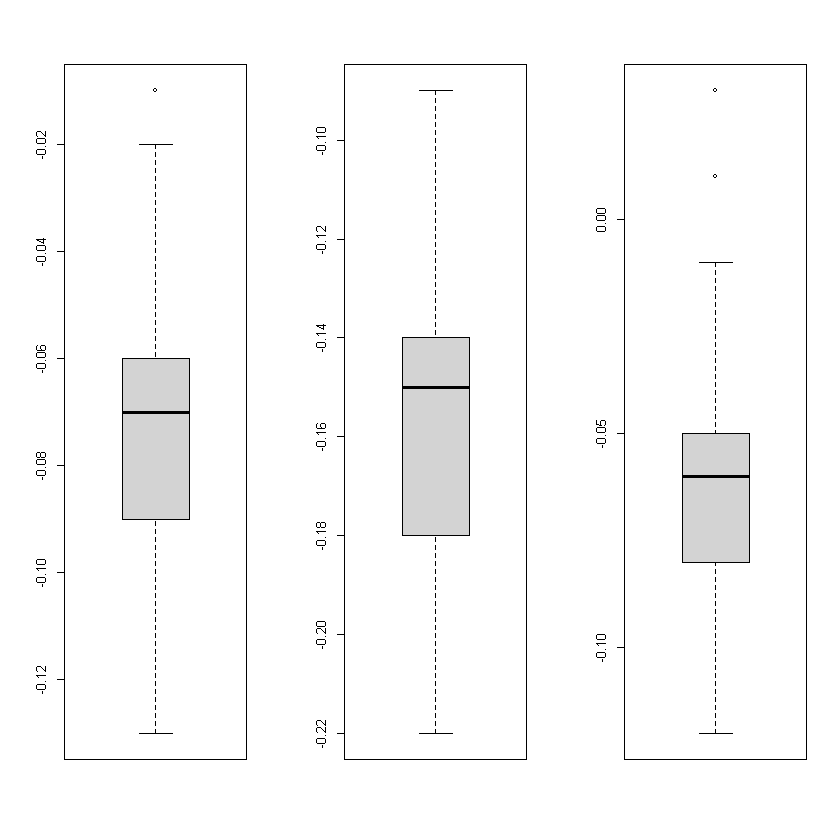

In [6]:
par(mfrow = c(1, 3))

boxplot(ranges$X1m)
boxplot(ranges$X2m)
boxplot(ranges$X3m)
xlab=colnames(ranges[0:3])


# df <- data.frame(A = rnorm(100), B = rnorm(100), C = rnorm(100))
# boxplot(A ~ 1, data = df, col = "red")



# # Boxplots of mpg by number of gears 
# # observations (points) are overlayed and jittered
# qplot(gear, mpg, data=mtcars, geom=c("boxplot", "jitter"), 
#    fill=gear, main="Mileage by Gear Number",
#    xlab="", ylab="Miles per Gallon")

### Multivariate outliers

Sometimes there is the risk that a multivariate outliers can be detected based on the univariate outliers in each feature, but this is not valid! The value appears in a corner and it seems a  multivariate outlier but it is not an outlier in each  feature. 

In [ ]:
#
plot(iris)

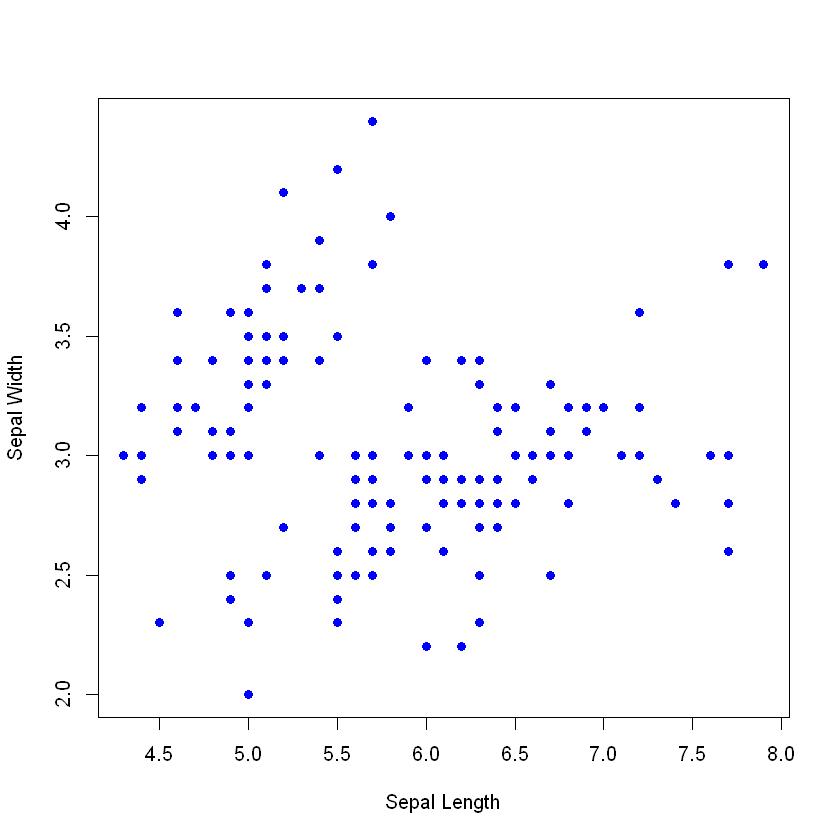

In [7]:
# Load the iris dataset
data("iris")

# Plot a bivariate boxplot
plot(iris$Sepal.Length, iris$Sepal.Width, pch=19, col="blue", 
     xlab="Sepal Length", ylab="Sepal Width")

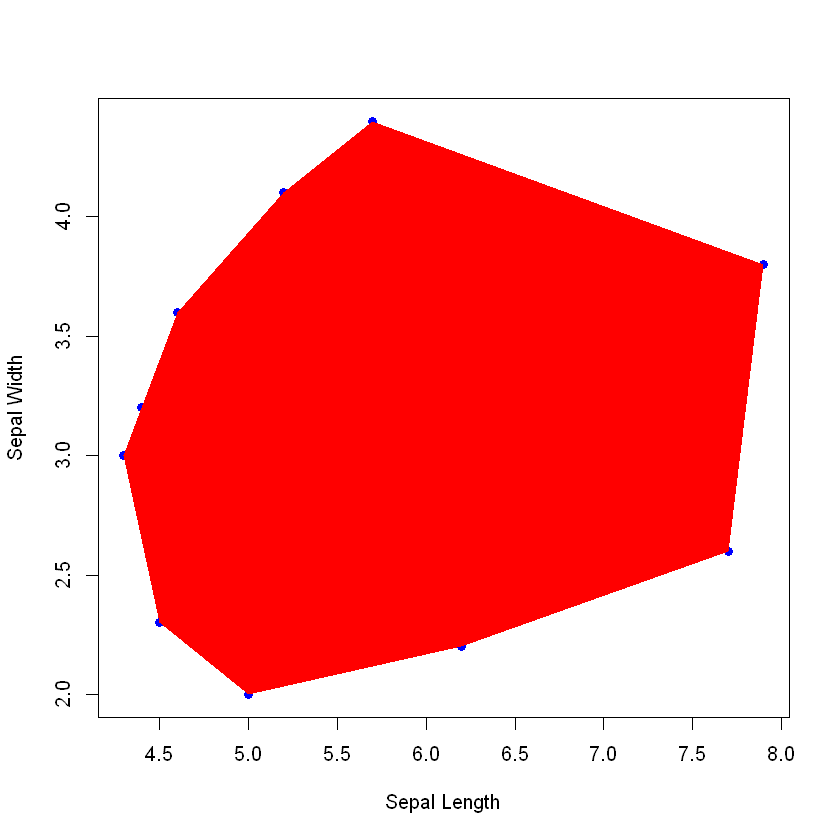

In [8]:
# Load the graphics library
library(graphics)

# Compute the convex hull
x <- iris$Sepal.Length
y <- iris$Sepal.Width
hull <- chull(x,y)

# Plot the convex hull on the bivariate boxplot
plot(x, y, pch=19, col="blue", xlab="Sepal Length", ylab="Sepal Width")
polygon(x[hull], y[hull], col="red", border=NA)

